<a href="https://colab.research.google.com/github/Muqeeth77/Customer_churn/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Load dataset
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(data.head())
print("\nShape:", data.shape)




   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
#Data Cleaning
data.drop('customerID', axis=1, inplace=True)

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())


In [ ]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

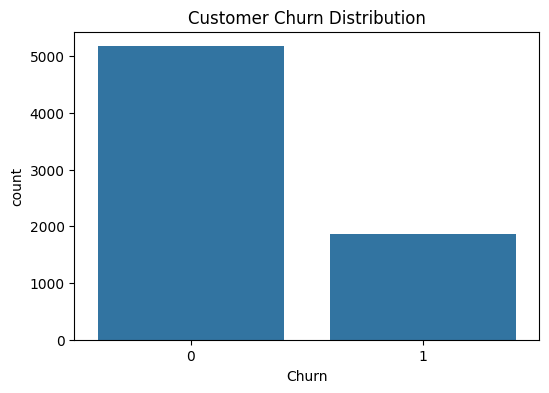

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title('Customer Churn Distribution')
plt.show()

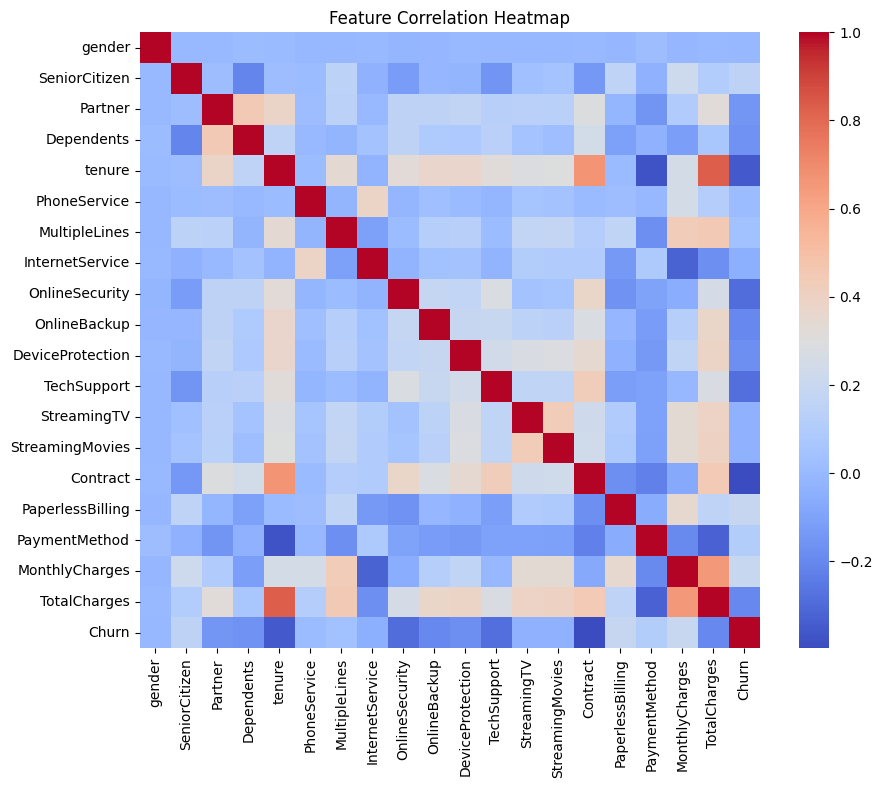

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train)
print(y_train)

[[ 1.15007441 -0.39556073 -0.78174979 ...  0.44870285 -0.66232922
  -0.17515137]
 [ 1.15007441 -0.39556073  1.27918167 ...  1.44933922  0.23838274
  -0.4249685 ]
 [ 1.15007441 -0.39556073  1.27918167 ...  1.44933922 -0.96314615
  -0.67982648]
 ...
 [ 1.15007441 -0.39556073 -0.78174979 ...  0.44870285  0.98865993
   1.19689104]
 [-0.86950895 -0.39556073 -0.78174979 ...  0.44870285  0.27293274
  -0.88276759]
 [-0.86950895 -0.39556073 -0.78174979 ... -1.55256989 -0.81001921
  -0.92750776]]
0       0
1       0
2       0
3       0
4       0
       ..
8273    1
8274    1
8275    1
8276    1
8277    1
Name: Churn, Length: 8278, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_estimators=100)

log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
models = {'Logistic Regression': log_reg, 'Decision Tree': dt, 'Random Forest': rf}

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1-Score'].append(f1_score(y_test, y_pred))

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.751597   0.523438  0.716578  0.604966
1        Decision Tree  0.719659   0.474820  0.529412  0.500632
2        Random Forest  0.781405   0.587766  0.590909  0.589333


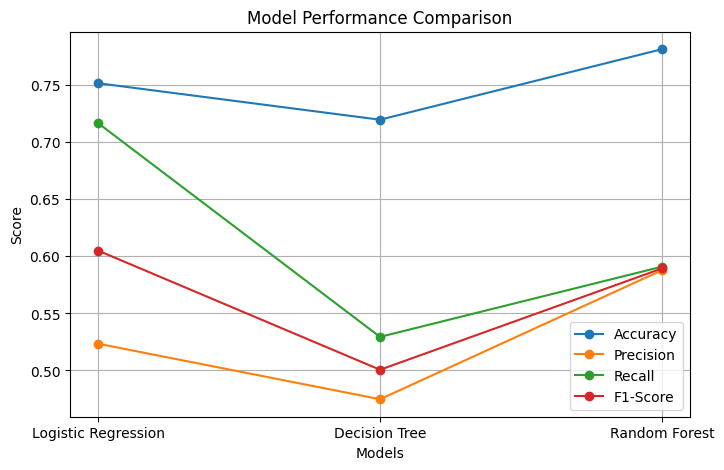

In [ ]:
plt.figure(figsize=(8,5))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


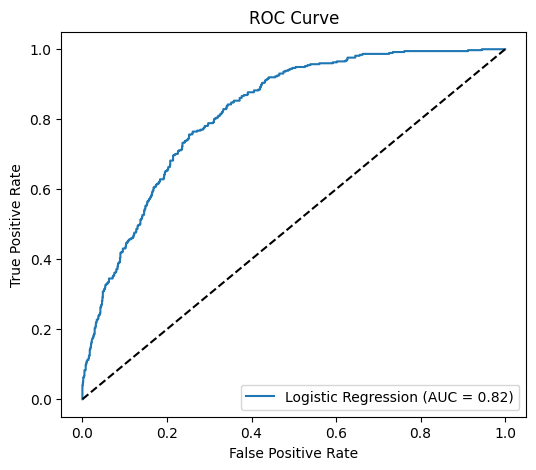

In [ ]:
y_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

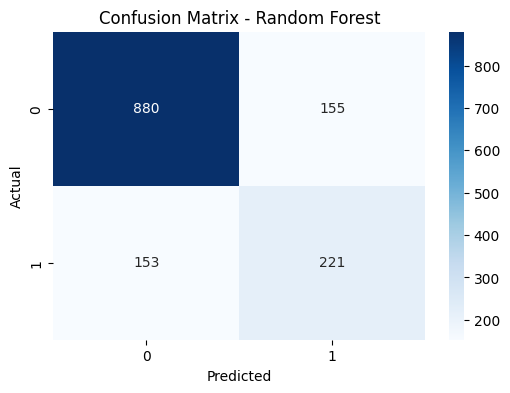

In [ ]:
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()